# Editing efficiency analysis

This notebook contains the code to analyze the overall editing efficiency (by C position) for all the validation sgRNAs that we tested. This notebook takes as input the nucleotide_percentage files generated by the BEV_nucleotide_percentage_plots notebook.

In [77]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

mpl.rc('pdf', fonttype=42)
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
sns.set_context('paper')
sns.set_style('ticks')
boxprops = {'edgecolor': 'k', 'linewidth': 0.5, 'facecolor': 'w'}
lineprops = {'color': 'k', 'linewidth': 0.5}
stripplot_kwargs = dict({'linewidth': 0.5, 'size': 3, 'alpha': 0.8})
boxplot_kwargs = dict({'boxprops': {'linewidth':0,'facecolor':'w'}, 'medianprops': {'linewidth':1},
                       'whiskerprops': {'linewidth':0}, 'capprops': {'linewidth':0},
                       'width': 0.8,'whis':(10,90)})

In [78]:
def run():
    input_file = pd.read_csv('../Data/Validation_CRISPResso_results/editing_efficiency/editing_efficiency_input_v3.csv')
    
    offset = []
    nuc_list = []
    sg_list = []
    edits_list = []
    expt_list = []

    for i,r in input_file.iterrows():
        # Open corresponding "nucleotide_percentage" file
        file_path = '../Data/Validation_CRISPResso_results/nucleotide_percentage/BEV_'+'_'.join(r['BEV_reps'].split(';'))+'_'+r['primer']+'.csv'
        data = pd.read_csv(file_path)
        # Filter for positions where WT nuc is C
        data = data[data['WT'] == 'C']
        for nuc in ['A','G','T','N','del']:
            col = nuc+'_avg'
            edits_list.extend(data[col].tolist())
            offset.extend(data['offset_position'].tolist())
            nuc_list.extend([nuc] * len(data))
            sg_list.extend([r['sg']] * len(data))
            expt_list.extend([r['Experiment']] * len(data))
    # Scale to percentage
    edits_list = [x*100 for x in edits_list]
    tuples_list = list(zip(edits_list,offset,nuc_list,sg_list,expt_list))
    df = pd.DataFrame(tuples_list, columns = ['Percentage', 'Position','Nucleotide','sg','Experiment'])
    df[df['Nucleotide'] == 'T'].sort_values(by='Percentage',ascending=False).head()
    return df

In [79]:
df = run()

In [80]:
df.loc[(df['Position'] >= 4) & (df['Position'] <= 8) & (df['Nucleotide'] == 'T'),'Position'].value_counts()

4    12
7    11
6    10
8     9
5     7
Name: Position, dtype: int64

In [81]:
def make_plot(nuc,experiments):
    color_dict = {'A':sns.color_palette('Set2')[0],
                  'G':sns.color_palette('Set2')[1],
                  'T':sns.color_palette('Set2')[2],
                  'del':sns.color_palette('Set2')[4]}
    fig,ax=plt.subplots(figsize=(4,1.5))
    sns.boxplot(x='Position',y='Percentage',data=df.loc[(df['Position'] >= -10) & (df['Position'] <= 20) &
                                                        (df['Nucleotide'] == nuc) & (df['Experiment'].isin(experiments))],
                fliersize=0,**boxplot_kwargs)
    sns.stripplot(x='Position',y='Percentage',data=df.loc[(df['Position'] >= -10) & (df['Position'] <= 20) &
                                                          (df['Nucleotide'] == nuc) & (df['Experiment'].isin(experiments))],
                  color=color_dict[nuc],**stripplot_kwargs)
    ax.set_ylim(0,100)
    if nuc == 'del':
        ax.set_title('deletions',fontsize=8)
    else:
        ax.set_title('C>'+nuc,fontsize=8)
    ax.set_ylabel('% conversion',fontsize=6)
    ax.set_xlabel('position of C', fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    return fig,ax

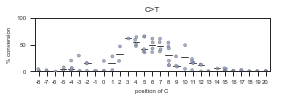

In [82]:
fig,ax = make_plot('T',['BRCA1','BRCA2'])
#fig.savefig('../Figures/Fig3_BRCA/BRCA_T_editing_eff.pdf',transparent=True)

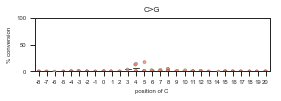

In [83]:
fig,ax = make_plot('G',['BRCA1','BRCA2'])
#fig.savefig('../Figures/Fig3_BRCA/BRCA_G_editing_eff.pdf',transparent=True)

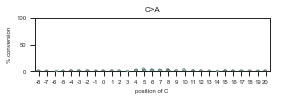

In [84]:
fig,ax = make_plot('A',['BRCA1','BRCA2'])
#fig.savefig('../Figures/Fig3_BRCA/BRCA_A_editing_eff.pdf',transparent=True)

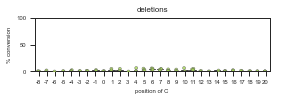

In [85]:
fig,ax = make_plot('del',['BRCA1','BRCA2'])
#fig.savefig('../Figures/Fig3_BRCA/BRCA_del_editing_eff.pdf',transparent=True)

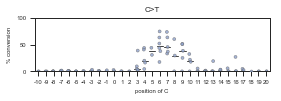

In [86]:
fig,ax = make_plot('T',['MCL1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/MCL1_T_editing_eff.pdf',transparent=True)

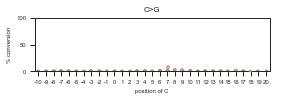

In [87]:
fig,ax = make_plot('G',['MCL1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/MCL1_G_editing_eff.pdf',transparent=True)

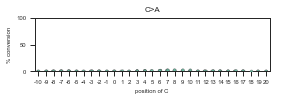

In [88]:
fig,ax = make_plot('A',['MCL1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/MCL1_A_editing_eff.pdf',transparent=True)

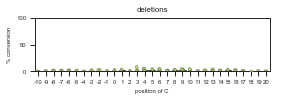

In [89]:
fig,ax = make_plot('del',['MCL1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/MCL1_del_editing_eff.pdf',transparent=True)

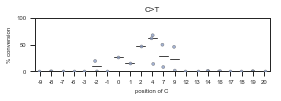

In [90]:
fig,ax = make_plot('T',['BCL2L1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/BCL2L1_T_editing_eff.pdf',transparent=True)

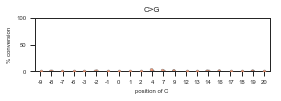

In [91]:
fig,ax = make_plot('G',['BCL2L1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/BCL2L1_G_editing_eff.pdf',transparent=True)

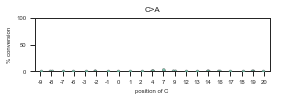

In [92]:
fig,ax = make_plot('A',['BCL2L1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/BCL2L1_A_editing_eff.pdf',transparent=True)

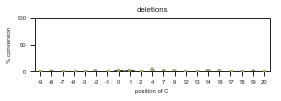

In [93]:
fig,ax = make_plot('del',['BCL2L1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/BCL2L1_del_editing_eff.pdf',transparent=True)

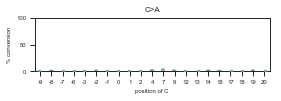

In [94]:
fig,ax = make_plot('A',['BCL2L1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/BCL2L1_A_editing_eff.pdf',transparent=True)

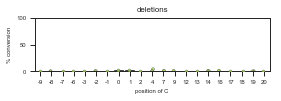

In [95]:
fig,ax = make_plot('del',['BCL2L1'])
#fig.savefig('../Figures/Fig5-6_MCL1_BCL2L1/BCL2L1_del_editing_eff.pdf',transparent=True)